Complete the following steps on the categorical columns in the dataset:

Check for null values in all the columns

Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories
ZIP CODE - we are including state already
Identify columns that over 85% missing values

Remove those columns from the dataframe

Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

Note that there are a few null values in the column. We will first replace those null values using the code below:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

## Loading libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading data

In [3]:
data = pd.read_csv('learningSet.csv')
data.shape

(95412, 481)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


## Finding NULL values

In [5]:
data.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

## Finding NULL values percentage

data.isna().sum()/len(data)

In [ ]:
## Creating a list to drop 

In [ ]:
drop_list = ['ZIP CODE','OSOURCE']

## Finding the columns with nulls more than the specified threashold

In [6]:
def filter_nulls(df, perc = .85):
  ''' This function gets a dataframe, inspects the percentage of null values in each column 
      and returns a list of those columns which has a percentage above the threshold value 
      provided by the user. A default percentage value of 25% is assumed unless another value
      is provided in the function arguments.
      Inputs: 
        df: a dataframe to inspec
        [perc]: percentage of null values in each column
      Outputs:
        list of columns which have a percentage of null values above the specified thershold.
  '''
  nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()  
  nulls_percent_df.columns = ['column_name', 'nulls_percentage']
  columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>perc]
  drop_columns_list = list(columns_above_threshold['column_name'])
  return drop_columns_list

In [7]:
### Applying function to data frame
drop_columns_list = filter_nulls(data)
drop_columns_list

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

In [ ]:
### dropping columns from the data frame

In [8]:
data = data.drop(columns=drop_columns_list)
data.shape

(95412, 456)

## Cleaning the column 'GENDER'

In [ ]:
## Checking the column for null values

In [9]:
print(data['GENDER'].value_counts())

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [ ]:
### Replacing the entries with specified name

In [10]:
data['GENDER'] = data['GENDER'].fillna('F')

In [11]:
## checking for the replacement
data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

## Creating a function to clean the 'GENDER' column

In [12]:
def clean_gender(df):
    '''This function will checkout the column 'GENDER' from a given dataframe 
       and it will replace the NA's or blankds by "other"
       Input:
         df: dataframe to perform the cleanup
       Output:
         df: dataframe with the 'GENDER' column values according to the new specficications.
    ''' 
        
    df2 = df.copy()
    df2['GENDER'] = np.where(df2['GENDER'].isin(['F','M']),df2['GENDER'],"other")

    return df2

In [13]:
data = clean_gender(data)
data['GENDER'].value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

## Numerical Data types

In [14]:
numerical = data.select_dtypes(np.number)

In [15]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_8,RDATE_9,RDATE_11,RDATE_12,RDATE_14,RDATE_16,RDATE_18,RDATE_19,RDATE_22,RDATE_24,RAMNT_8,RAMNT_9,RAMNT_11,RAMNT_12,RAMNT_14,RAMNT_16,RAMNT_18,RAMNT_19,RAMNT_22,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,9507.0,9505.0,NaN,NaN,NaN,9406.0,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,

## Finding NULL values in numerical dataframe

In [16]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
7,MBCRAFT,52854
8,MBGARDEN,52854
...,...,...
361,RAMNT_22,74539
362,RAMNT_24,77674
373,NEXTDATE,9973
374,TIMELAG,9973


### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

### WEALTH 1

In [18]:
numerical['WEALTH1'].isna().sum()

44732

In [17]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

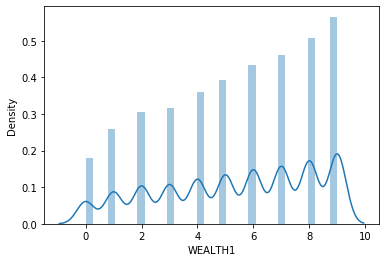

In [19]:
sns.distplot(numerical['WEALTH1'])
plt.show()

In [25]:
##changing data type to object
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [26]:
numerical['WEALTH1'].value_counts(sorted).reset_index()

,index,WEALTH1
0,9.0,0.548327
1,8.0,0.071196
2,7.0,0.064960
3,6.0,0.061051
4,5.0,0.055339
5,4.0,0.050413
6,3.0,0.044407
7,2.0,0.042814
8,1.0,0.036201
9,0.0,0.025290


In [27]:
mode = numerical['WEALTH1'].value_counts(sorted).reset_index().iloc[0,0]

In [28]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(mode)

In [29]:
numerical['WEALTH1'].isna().sum()

0

### GEOCODE

In [33]:
data['GEOCODE2'].isna().sum()

132

In [32]:
data['GEOCODE2'].value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [35]:
mode = data['GEOCODE2'].value_counts(sorted).reset_index().iloc[0,0]

In [36]:
data['GEOCODE2'] = data['GEOCODE2'].fillna(mode)

In [37]:
data['GEOCODE2'].isna().sum()

0

### ADI

In [38]:
numerical['ADI'].isna().sum()

132

In [39]:
numerical['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
601.0       1
147.0       1
161.0       1
103.0       1
Name: ADI, Length: 204, dtype: int64

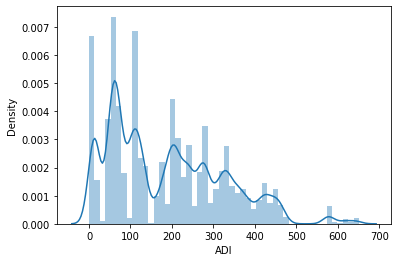

In [40]:
sns.distplot(numerical['ADI'])
plt.show()

In [41]:
## replacing NA with mean 
numerical['ADI'] = numerical['ADI'].fillna(np.mean(numerical['ADI']))

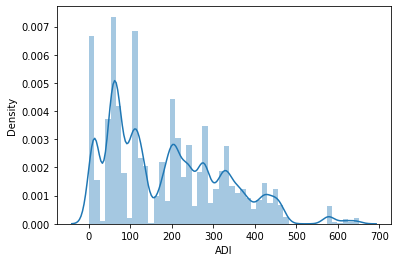

In [42]:
sns.distplot(numerical['ADI'])
plt.show()

In [43]:
numerical['ADI'].isna().sum()

0

### DMA

In [44]:
numerical['DMA'].isna().sum()

132

In [45]:
numerical['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
552.0       1
584.0       1
516.0       1
554.0       1
Name: DMA, Length: 206, dtype: int64

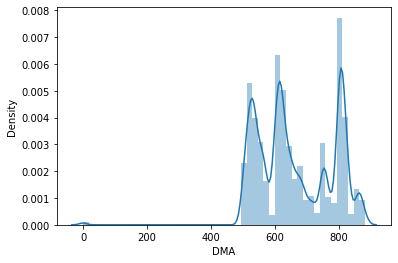

In [46]:
sns.distplot(numerical['DMA'])
plt.show()

In [47]:
### replacing NA with mean 
numerical['DMA'] = numerical['DMA'].fillna(np.mean(numerical['DMA']))

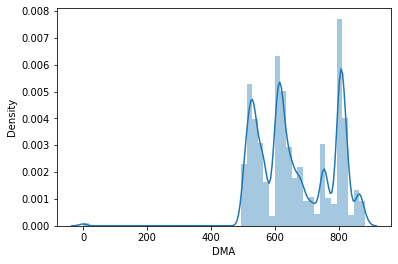

In [48]:
sns.distplot(numerical['DMA'])
plt.show()

In [49]:
numerical['DMA'].isna().sum()

0

### MSA

In [50]:
numerical['MSA'].isna().sum()

132

In [51]:
numerical['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
3180.0        1
6323.0        1
9280.0        1
743.0         1
960.0         1
Name: MSA, Length: 298, dtype: int64

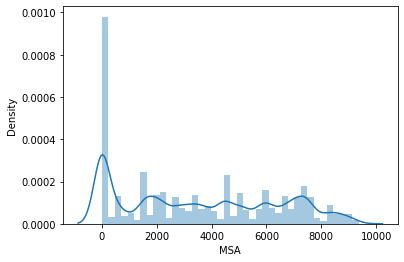

In [52]:
sns.distplot(numerical['MSA'])
plt.show()

In [53]:
### replacing NA with mean 
numerical['MSA'] = numerical['MSA'].fillna(np.mean(numerical['MSA']))

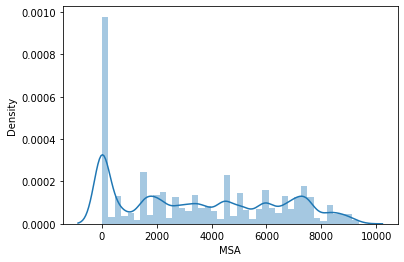

In [54]:
sns.distplot(numerical['MSA'])
plt.show()

In [55]:
numerical['MSA'].isna().sum()

0